In [1]:
from process_helper import *
import numpy as np

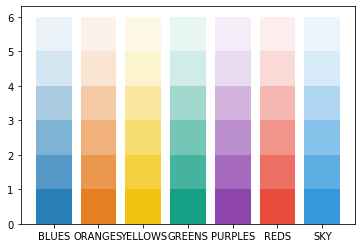

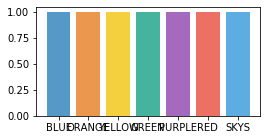

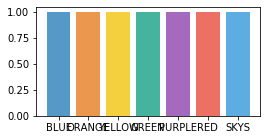

<Figure size 288x144 with 0 Axes>

In [2]:
_, grad_colors = display_colors()
_, bar_colors = select_color_idx(4)
_, line_colors = select_color_idx(4)

In [3]:
plt.rcParams.update({'font.size': 15})
import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 0.5

In [4]:
datadir = "../output/"

## Experiment 1: limit = 16k

In [5]:
exp = "exp_mix_10g_fanout250"

In [15]:
data = [json.loads(line) for line in open(datadir + exp + ".txt")]
df = pd.DataFrame().from_records(data)

In [7]:
df.columns

Index(['abort_cnt_', 'accesses_', 'avg_commit_queue_sz_',
       'avg_log_flush_interval_ (us)', 'avg_log_group_sz_',
       'avg_log_latency_ (us)', 'avg_per_worker_runtime_sec',
       'avg_sum_commit_latency (us)', 'avg_sum_log_flush_latency (us)',
       'bufferd_idx_pgs_', 'cc_time_ms', 'commit_cnt_',
       'commit_latency_perc0_us', 'commit_latency_perc50_us',
       'commit_latency_perc99_us', 'commit_queue_sz_', 'g_buf_entry_sz',
       'g_buf_type', 'g_check_loaded', 'g_commit_group_sz', 'g_commit_pool_sz',
       'g_commit_queue_limit', 'g_cpu_freq', 'g_early_lock_release',
       'g_enable_group_commit', 'g_enable_logging',
       'g_enable_phantom_protection', 'g_force_write', 'g_idx_btree_fanout',
       'g_idx_btree_split_ratio', 'g_index_type', 'g_load_range',
       'g_load_to_remote_only', 'g_log_freq_us', 'g_node_id',
       'g_num_restore_thds', 'g_num_worker_threads', 'g_pagebuf_num_slots',
       'g_partition_sz', 'g_remote_req_retries', 'g_restore_from_remote',
 

In [9]:
# create pivot table
df0 = apply_mask(df, [
    ["g_buf_type", ["eq", "OBJBUF"]],
    ["g_enable_phantom_protection", ["eq", "True"]],
    ["read_perc_", 0.9]
])
pivot0 = df0.groupby([
    "g_total_buf_sz",
])[
    "throughput_txn_per_sec","abort_cnt_","hit_rate_","misses_", 
    "avg_log_group_sz_","avg_sum_log_flush_latency (us)",
    "avg_log_latency_ (us)", "avg_log_flush_interval_ (us)", 
    "num_flushes_", "remote_rds_", "commit_cnt_", "remote_rd_time_ms"
    ].max()
pivot0

,throughput_txn_per_sec,abort_cnt_,hit_rate_,misses_,avg_log_group_sz_,avg_sum_log_flush_latency (us),avg_log_latency_ (us),avg_log_flush_interval_ (us),num_flushes_,remote_rds_,commit_cnt_,remote_rd_time_ms
g_total_buf_sz,,,,,,,,,,,,
3000000000,509.54,169826,0.942759,489105,11.7922,10858.5,3729.08,11557.7,5192,17905,61224,958986.0
6000000000,1083.35,234301,0.958041,486475,29.2101,12892.4,2042.19,13443.7,4456,18685,130160,957993.0
9000000000,3201.15,601766,0.984946,477171,512.5980,79478.9,2324.56,79767.5,752,19742,384783,623792.0
15000000000,3521.78,8474,1.000000,0,828.1120,116873.0,2266.95,117376.0,516,0,427306,0.0


In [10]:
# create pivot table
df2 = apply_mask(df, [
    ["g_buf_type", ["eq", "PGBUF"]],
    ["g_enable_phantom_protection", ["eq", "True"]],
    ["read_perc_", 0.9]
])
pivot2 = df2.groupby([
    "g_total_buf_sz",
])[
    "throughput_txn_per_sec","abort_cnt_","hit_rate_","misses_", 
    "avg_log_group_sz_","avg_sum_log_flush_latency (us)",
    "avg_log_latency_ (us)", "avg_log_flush_interval_ (us)", 
    "num_flushes_", "g_buf_type", "remote_rds_", "commit_cnt_", "remote_rd_time_ms",
    "idx_misses_", "idx_accesses_"
    ].max()
pivot2

,throughput_txn_per_sec,abort_cnt_,hit_rate_,misses_,avg_log_group_sz_,avg_sum_log_flush_latency (us),avg_log_latency_ (us),avg_log_flush_interval_ (us),num_flushes_,g_buf_type,remote_rds_,commit_cnt_,remote_rd_time_ms,idx_misses_,idx_accesses_
g_total_buf_sz,,,,,,,,,,,,,,,
3000000000,557.329,770081,0.995293,176761,12.8413,11406.4,6379.00,11448.7,5384,PGBUF,176761,67430,961917.0000,5537,8041956
6000000000,906.518,873333,0.995946,180614,24.0825,12807.3,4645.81,12834.0,4676,PGBUF,180614,112572,971980.0000,8300,9334539
9000000000,1473.230,896409,0.997023,169945,48.0262,15661.2,3346.12,15710.0,3818,PGBUF,169945,183364,930834.0000,10864,9740883
15000000000,3578.700,9109,1.000000,2,825.0380,114717.0,2233.65,115238.0,521,PGBUF,2,429845,11.2048,2,3294817


In [16]:
# create pivot table
df3 = apply_mask(df, [
    ["g_buf_type", ["eq", "NOBUF"]],
    ["read_perc_", 0.9]
])
pivot3 = df3.groupby([
    "g_total_buf_sz", 
])[
    "throughput_txn_per_sec","abort_cnt_","hit_rate_","misses_", 
    "avg_log_group_sz_","avg_sum_log_flush_latency (us)",
    "avg_log_latency_ (us)", "avg_log_flush_interval_ (us)", "commit_cnt_",
    "num_flushes_", "g_buf_type", "remote_rds_", "remote_rd_time_ms"
    ].max()
pivot3

,throughput_txn_per_sec,abort_cnt_,hit_rate_,misses_,avg_log_group_sz_,avg_sum_log_flush_latency (us),avg_log_latency_ (us),avg_log_flush_interval_ (us),commit_cnt_,num_flushes_,g_buf_type,remote_rds_,remote_rd_time_ms
g_total_buf_sz,,,,,,,,,,,,,
3000000000,112.37,39,0.0,782959,1.93935,8553.35,12951.2,8624.03,13492,6958,NOBUF,24169,479690.0


[0.3, 0.6, 0.9, 1.3]


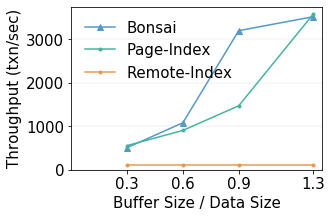

In [17]:
workload_ratio = [round(sz / 10240000000.0 * 10) / 10.0 for sz in pivot0.index]
workload_ratio[-1] = 1.3
print(workload_ratio)
fig, ax = plt.subplots(1, 1)
ax.plot(workload_ratio, 
        pivot0["throughput_txn_per_sec"],
        color=line_colors["BLUE"],
        marker="^", label="Bonsai")
ax.plot(workload_ratio, 
        pivot2["throughput_txn_per_sec"],
        color=line_colors["GREEN"],
        marker=".", label="Page-Index")
ax.plot(workload_ratio, 
        [pivot3["throughput_txn_per_sec"].values] * pivot0.shape[0],
        color=line_colors["ORANGE"],
        marker=".", label="Remote-Index")
# ax.set_title(plot_names[i])
plt.legend(frameon=False)
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)
ax.set_xticks(workload_ratio)
ax.set_xlabel("Buffer Size / Data Size")
ax.set_ylabel("Throughput (txn/sec)")
fig.set_size_inches(4.5, 3)
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.25)
path = "/Users/scarlet/Desktop/Bonsai/figures/"
fig.savefig(path + "mix_10g_fanout250_limit16k.pdf", bbox_inches="tight") 

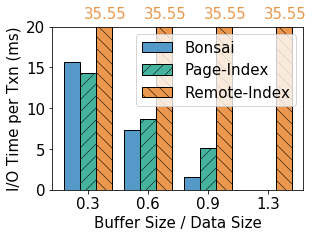

In [20]:
fig, ax = plt.subplots(1, 1)
xvals = np.arange(len(workload_ratio))
width = (1 - 0.2) / 3
ax.bar(xvals, pivot0["remote_rd_time_ms"] / pivot0["commit_cnt_"],
       width=width, edgecolor="black", 
       facecolor=bar_colors["BLUE"], label="Bonsai")
ax.bar(xvals + width, pivot2["remote_rd_time_ms"] / pivot2["commit_cnt_"],
      width=width, edgecolor="black", hatch="//",
       facecolor=bar_colors["GREEN"], label="Page-Index")
ax.bar(xvals + width*2, pivot3["remote_rd_time_ms"] / pivot3["commit_cnt_"],
      width=width, edgecolor="black", hatch="\\\\",
       facecolor=bar_colors["ORANGE"], label="Remote-Index")
for x in xvals:
    y = pivot3["remote_rd_time_ms"] / pivot3["commit_cnt_"]
    ax.text(x + 0.2, 21, "%.2f" % y, color=line_colors["ORANGE"])
ax.set_ylim(0, 20)
plt.xticks(xvals + width, workload_ratio)
ax.set_xlabel("Buffer Size / Data Size")
ax.set_ylabel("I/O Time per Txn (ms)")
fig.set_size_inches(4.5, 3)
plt.legend()
path = "/Users/scarlet/Desktop/Bonsai/figures/"
fig.savefig(path + "mix_10g_fanout250_limit16k_analysis.pdf", bbox_inches="tight") 